<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/API_Example_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APIs and API wrappers

##API: Application Programming Interface presents a set of rules shaping a service*:

1.   format of data to be read (most probably .json, but sometimes .csv) 
2.   commands used to access a computing service
3.   what data this service can return in the response. ​

"The API acts as a layer between your application and external service. You do not need to know the internal structure and features of the service, you just send a certain simple command and receive data in a predetermined format" [1]

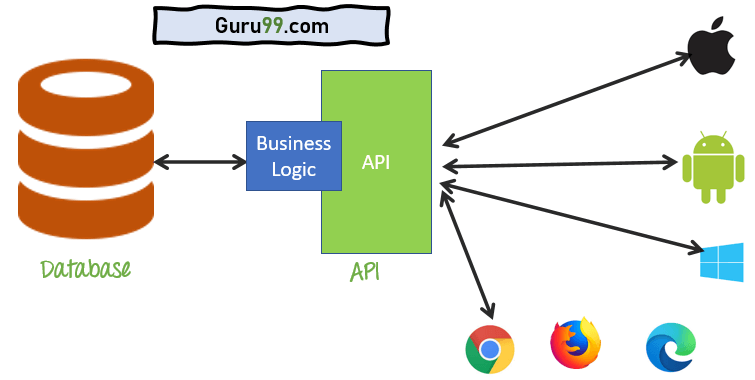​

[Image Source](https://www.guru99.com/what-is-api.html)


A wrapper makes the use of the API's even simpler. In the first example, we will use a Reddit API to collect data about a subreddit called "[Ex_Foster](https://www.reddit.com/r/Ex_Foster/)."

First, we will install a python wrapper for one of the Reddit API's created by Pushhift - [PSAW](https:pypi.org/project/psaw/). 

[1] [https://rapidapi.com/blog/how-to-use-an-api-with-python/](https://rapidapi.com/blog/how-to-use-an-api-with-python/)

* computing service

In [51]:
#first, let's install the wrapper PSAW
#using !, we can introduce commands that allow us to install packages etc.
!pip install psaw

In [52]:
import pandas as pd
#we will need datetime in order to specify the timeline we need to collect the data
import datetime as dt

#now we import the wrapper in order to use the API
from psaw import PushshiftAPI

api = PushshiftAPI()

In [53]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
#this function will allow us to find the last day of each month
#for example, there are 31 days in January, but 28 this February
def last_day_of_month(any_day):
    # this will never fail
    # get close to the end of the month for any day, and add 4 days 'over'
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    # subtract the number of remaining 'overage' days to get last day of current month, or said programattically said, the previous day of the first of next month
    return next_month - datetime.timedelta(days=next_month.day)

In [56]:
#let's read the comments between 2019 and 2020
#including all the months between Janury and December
subreddit_name = input('Enter the name of the subreddit ')
start_year = int(input('Enter the start year '))
end_year= int(input('Enter the end year '))
start_month = int(input('Enter the first month '))
end_month = int(input('Enter the last month '))

Enter the name of the subreddit Ex_Foster
Enter the start year 2019
Enter the end year 2021
Enter the first month 1
Enter the last month 12


In [57]:
import datetime
subredditlist = [subreddit_name]
for reddit in subredditlist:
    for y in range(2019,2022):
      for i in range(1,13):
          file_name= str(reddit)+"_"+str(y)+"_"+str(i)+".json"
          print("starting with the month "+str(i))
          print("for subreddit..."+str(reddit))
          print("setting start epoch...")
          start_epoch=int(dt.datetime(y, i, 1).timestamp())
          print("setting end epoch...")
          last_day = last_day_of_month(datetime.date(y, i, 1))
          print("the last day of the month is...")
          print(last_day.day)
          last_day = int(last_day.day)
          end_epoch = int(dt.datetime(y,i,last_day).timestamp())
          print("setting up the generator...")
          gen = api.search_comments(after=start_epoch, before=end_epoch,subreddit=reddit)
          print("setting up the dataframe...")
          df = pd.DataFrame([obj.d_ for obj in gen])
          print("The number of comments for year "+ str(y)+" and month "+str(i)+" is "+str(len(df.index)))
          df.to_json(file_name)

starting with the month 1
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...


/usr/local/lib/python3.6/dist-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


The number of comments for year 2019and month 1 is 0
starting with the month 2
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
28
setting up the generator...
setting up the dataframe...
The number of comments for year 2019and month 2 is 0
starting with the month 3
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019and month 3 is 69
starting with the month 4
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2019and month 4 is 233
starting with the month 5
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019a

In [58]:
#now I want to get the folder name without having to write the complete address of the current working directory
import os
#get current working directory (CWD)
cwd = os.getcwd()
print(cwd)

/content


In [59]:
# The glob module finds all the pathnames matching a specified pattern 
# https://docs.python.org/3/library/glob.html
# We want to find all the files that start with Ex_Foster AND end with .json
import glob
#create an empty list to add things to it
contents = []
#json_dir_name becomes the current working directory
json_dir_name = cwd
# Again, we want to find all the files that start with [Ex_Foster AND end with .json]
json_pattern = os.path.join(json_dir_name, 'Ex_Foster*.json')
file_list = glob.glob(json_pattern)
for file in file_list:
    contents.append(file)

In [60]:
#let's take a look at contents
contents

['/content/Ex_Foster_2021_10.json',
 '/content/Ex_Foster_2021_4.json',
 '/content/Ex_Foster_2019_2.json',
 '/content/Ex_Foster_2021_7.json',
 '/content/Ex_Foster_2020_11.json',
 '/content/Ex_Foster_2020_1.json',
 '/content/Ex_Foster_2020_7.json',
 '/content/Ex_Foster_2021_8.json',
 '/content/Ex_Foster_2021_9.json',
 '/content/Ex_Foster_2019_10.json',
 '/content/Ex_Foster_2021_3.json',
 '/content/Ex_Foster_2019_5.json',
 '/content/Ex_Foster_2020_6.json',
 '/content/Ex_Foster_2019_12.json',
 '/content/Ex_Foster_2020_10.json',
 '/content/Ex_Foster_2021_11.json',
 '/content/Ex_Foster_2021_1.json',
 '/content/Ex_Foster_2019_1.json',
 '/content/Ex_Foster_2021_12.json',
 '/content/Ex_Foster_2019_4.json',
 '/content/Ex_Foster_2020_2.json',
 '/content/Ex_Foster_2019_8.json',
 '/content/Ex_Foster_2020_3.json',
 '/content/Ex_Foster_2019_7.json',
 '/content/Ex_Foster_2019_9.json',
 '/content/Ex_Foster_2020_12.json',
 '/content/Ex_Foster_2021_5.json',
 '/content/Ex_Foster_2020_9.json',
 '/content/E

In [61]:
#import json
#collecting all the json files into one pandas dataframe
df = pd.DataFrame()
for file in contents:
    print('reading...')
    print(file)
    tmp_frame = pd.read_json(file)
    #appending the new pandas dataframe to the earlier ones
    #remember how we appended the pandas DataFrame to itself 
    #in https://github.com/tawfiqam/MI564/blob/main/Pandas_Introduction.ipynb
    df = df.append(tmp_frame, ignore_index=True)

reading...
/content/Ex_Foster_2021_10.json
reading...
/content/Ex_Foster_2021_4.json
reading...
/content/Ex_Foster_2019_2.json
reading...
/content/Ex_Foster_2021_7.json
reading...
/content/Ex_Foster_2020_11.json
reading...
/content/Ex_Foster_2020_1.json
reading...
/content/Ex_Foster_2020_7.json
reading...
/content/Ex_Foster_2021_8.json
reading...
/content/Ex_Foster_2021_9.json
reading...
/content/Ex_Foster_2019_10.json
reading...
/content/Ex_Foster_2021_3.json
reading...
/content/Ex_Foster_2019_5.json
reading...
/content/Ex_Foster_2020_6.json
reading...
/content/Ex_Foster_2019_12.json
reading...
/content/Ex_Foster_2020_10.json
reading...
/content/Ex_Foster_2021_11.json
reading...
/content/Ex_Foster_2021_1.json
reading...
/content/Ex_Foster_2019_1.json
reading...
/content/Ex_Foster_2021_12.json
reading...
/content/Ex_Foster_2019_4.json
reading...
/content/Ex_Foster_2020_2.json
reading...
/content/Ex_Foster_2019_8.json
reading...
/content/Ex_Foster_2020_3.json
reading...
/content/Ex_Fost

In [62]:
len(df)

4823

In [63]:
#Now let's check the shape of the DataFrame
df.shape

(4823, 41)

In [64]:
df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,created,edited,distinguished,steward_reports,updated_utc,author_cakeday
0,[],NaN,LawlessFreedom,None,NaN,[],None,None,None,text,t2_12eiui,0.0,0.0,[],Thank you for having the courage to tell us ab...,NaN,NaN,1606690300,{},ge39vw3,False,t3_k3ih6a,0.0,True,t3_k3ih6a,/r/Ex_Foster/comments/k3ih6a/my_dog_that_i_got...,1606696665,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1606690300,NaN,NaN,NaN,NaN,NaN
1,[],NaN,Scout_treks,None,NaN,[],None,None,None,text,t2_3a9w5qrt,0.0,0.0,[],I am so sorry for your loss. I am so glad the ...,NaN,NaN,1606689818,{},ge38y1d,False,t3_k3ih6a,0.0,True,t3_k3ih6a,/r/Ex_Foster/comments/k3ih6a/my_dog_that_i_got...,1606696159,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1606689818,NaN,NaN,NaN,NaN,NaN
2,[],NaN,Mildred27,None,NaN,[],None,None,None,text,t2_3une1g1m,0.0,0.0,[],Im so sorry 😭,NaN,NaN,1606689811,{},ge38xiv,False,t3_k3ih6a,0.0,True,t3_k3ih6a,/r/Ex_Foster/comments/k3ih6a/my_dog_that_i_got...,1606696153,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1606689811,NaN,NaN,NaN,NaN,NaN
3,[],NaN,spinnetrouble,None,NaN,[],None,None,None,text,t2_79iyb,0.0,0.0,[],I'm so sorry. The loss of a family member can ...,NaN,NaN,1606689325,{},ge3809b,False,t3_k3ih6a,0.0,False,t3_k3ih6a,/r/Ex_Foster/comments/k3ih6a/my_dog_that_i_got...,1606695662,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1606689325,NaN,NaN,NaN,NaN,NaN
4,[],NaN,Wtfgrandma,None,NaN,[],None,None,None,text,t2_ashc8,0.0,0.0,[],It sounds you've got a lot of stuff going on. ...,NaN,NaN,1606679044,{},ge2k1rr,False,t3_k31eu5,0.0,True,t1_ge2hd2z,/r/Ex_Foster/comments/k31eu5/i_just_need_to_be...,1606682810,1,True,False,Ex_Foster,t5_ykjzi,NaN,0.0,[],1606679044,NaN,NaN,NaN,NaN,NaN


In [71]:
df['created_utc'] = pd.to_datetime(df['created_utc'],unit='s')

In [72]:
df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,created,distinguished,author_cakeday
0,[],None,croobar,None,None,[],None,None,None,text,t2_9g0jk,False,False,[],How can retards manipulate the stock market?,None,None,2021-01-22 11:29:59,{},gk5zhfz,False,t3_l2ljpt,False,False,t1_gk5z684,/r/wallstreetbets/comments/l2ljpt/gmreeeeeeeee...,1611445495,5,True,False,wallstreetbets,t5_2th52,None,0,[],1.611315e+09,NaN,NaN
1,[],None,DeepthroatNanny123,,None,[],None,None,,text,t2_60t4aadh,False,False,[],Maybe if her boyfriend is gay and she wants to...,None,None,2021-01-22 11:29:59,{},gk5zhfe,False,t3_l27ngc,False,True,t1_gk5yv8f,/r/wallstreetbets/comments/l27ngc/what_are_you...,1611445494,2,True,False,wallstreetbets,t5_2th52,None,0,[],1.611315e+09,NaN,NaN
2,[],None,skyline917,None,None,[],None,None,None,text,t2_6fm2ppsl,False,False,[],Nein,None,None,2021-01-22 11:29:59,{},gk5zhef,False,t3_l2lfqs,False,False,t1_gk5zelc,/r/wallstreetbets/comments/l2lfqs/daily_discus...,1611445494,8,True,False,wallstreetbets,t5_2th52,None,0,[],1.611315e+09,NaN,NaN
3,[],None,U_JiveTurkey,None,None,[],None,None,None,text,t2_6jf585tg,False,False,[],It might go up this year considering they were...,None,None,2021-01-22 11:29:58,{},gk5zhdw,False,t3_l2lfqs,False,True,t1_gk5xxcw,/r/wallstreetbets/comments/l2lfqs/daily_discus...,1611445494,2,True,False,wallstreetbets,t5_2th52,None,0,[],1.611315e+09,NaN,NaN
4,[],None,pepe_____-,,None,"[{'e': 'text', 't': '210115:1:1'}]",None,210115:1:1,dark,richtext,t2_5p2av017,False,False,[],Till 100k minimum wtf,None,None,2021-01-22 11:29:54,{},gk5zh7d,False,t3_l2ljpt,False,False,t1_gk5z82w,/r/wallstreetbets/comments/l2ljpt/gmreeeeeeeee...,1611445490,5,True,False,wallstreetbets,t5_2th52,None,0,[],1.611315e+09,NaN,NaN


In [80]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

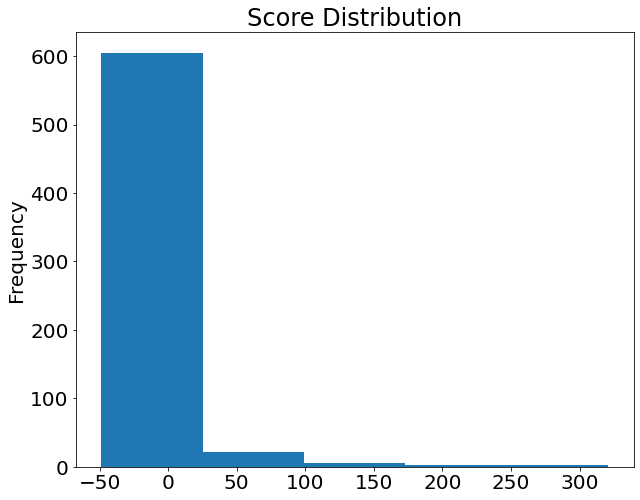

In [81]:
df['score'].plot(kind='hist',title='Score Distribution', bins=5);

In [82]:
#Now let's try describe
#Again....check the Introduction to Pandas 
df['score'].describe()

count    636.000000
mean       7.982704
std       26.384283
min      -49.000000
25%        1.000000
50%        2.500000
75%        6.000000
max      321.000000
Name: score, dtype: float64

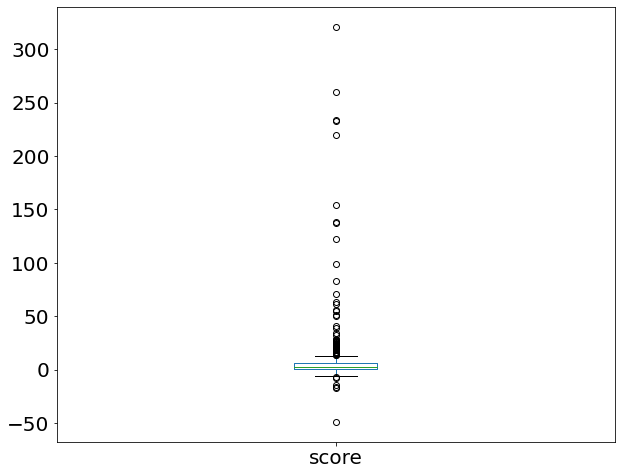

In [83]:
df['score'].plot(kind='box')

So, there are comments represent as an outlier. Let's sample what some of these comments are talking about...

In [84]:
df[df['score']>300].body

305    should I sell my 15 shares of TSLA - to go all...
Name: body, dtype: object

woops...forgot that I need to show the complete text

In [85]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [86]:
df[df['score']>300].body

305    should I sell my 15 shares of TSLA - to go all in on GME ??!!!!??!
Name: body, dtype: object